In [ ]:
import pandas as pd
import numpy as np
import re,sns
import seaborn as sns

# Read CSV and concat all files

In [ ]:
# read CSV and concat all files

AI = 'AI'
CV = 'computer+vision'
NLP = 'natural+language+processing'
DS = 'data+science'
ML = 'machine+learning'
domain=[AI,CV,NLP,DS,ML]

NY = 'New+York'
SF = 'San+Francisco'
SE = 'Seattle'
region=[NY,SF,SE]

data = pd.DataFrame()
for i in region:
    for j in domain:
        csv_file = str(j) + '_' + str(i) + '.csv'
        print(csv_file)
        csv_data = pd.read_csv(csv_file)
        csv_df = pd.DataFrame(csv_data)
        csv_df['SearchRegion'] = i
        csv_df['SearchDomain'] = j
#         print(csv_df)
        frames = [data, csv_df]
        data = pd.concat(frames)

# reset index
data.reset_index(inplace=True,drop=True)
# save
data.to_csv('data.csv',index=False,header=True)

AI_New+York.csv
computer+vision_New+York.csv
natural+language+processing_New+York.csv
data+science_New+York.csv
machine+learning_New+York.csv
AI_San+Francisco.csv
computer+vision_San+Francisco.csv
natural+language+processing_San+Francisco.csv
data+science_San+Francisco.csv
machine+learning_San+Francisco.csv
AI_Seattle.csv
computer+vision_Seattle.csv
natural+language+processing_Seattle.csv
data+science_Seattle.csv
machine+learning_Seattle.csv


# Preprocessing

In [ ]:
#look data
data.head()

,JobTitle,CompanyName,CompanyLocation,CompanyRating,Salary,Date,Extract_Date,Content_url,Content_text,SearchRegion,SearchDomain
0,Biomedical Data Scientist,PathAI,New York State•Remote,None,None,Posted30+ days ago,2021-12-04,https://www.indeed.com/rc/clk?jk=4a4a05d418f91...,PathAI's mission is to improve patient outcome...,New+York,AI
1,newPractitioner Sales Hunter - Infra,Wipro Limited,"Addison, NY",3.8,None,Posted2 days ago,2021-12-04,https://www.indeed.com/rc/clk?jk=34a490c881eaf...,Overview:\n\nBackground: Wipro's Cloud & Infra...,New+York,AI
2,Senior Data & Applied Scientist,Microsoft,"New York, NY+3 locations",4.2,None,Posted16 days ago,2021-12-04,https://www.indeed.com/rc/clk?jk=f330f26474763...,Are you seeking opportunities at the intersect...,New+York,AI
3,Recruiter - Technology,Bowery Farming,"New York, NY",3.6,None,EmployerActive 2 days ago,2021-12-04,https://www.indeed.com/company/Bowery-Farming/...,"Founded in 2015, Bowery Farming is on a missio...",New+York,AI
4,Machine Learning Engineer,"Amazon Dev Center U.S., Inc.","New York, NY+4 locations",3.5,None,Posted10 days ago,2021-12-04,https://www.indeed.com/rc/clk?jk=1a5d39d30e5d2...,\nCurrently enrolled or recently completed a g...,New+York,AI


In [ ]:
# shape
data.shape

(11167, 11)

In [ ]:
# describe
data.describe()

,JobTitle,CompanyName,CompanyLocation,CompanyRating,Salary,Date,Extract_Date,Content_url,Content_text,SearchRegion,SearchDomain
count,11167,11167,11167,11167,11167,11167,11167,11167,11167,11167,11167
unique,5053,2241,1280,37,459,61,1,6859,6240,3,5
top,Data Scientist,Amazon.com Services LLC,"San Francisco, CA",None,None,Posted30+ days ago,2021-12-04,https://www.indeed.com/rc/clk?jk=e37542ae49b6b...,None,New+York,data+science
freq,290,473,1034,3149,10149,6598,11167,29,103,3743,2310


In [ ]:
# count null element
data.isnull().sum()

JobTitle           0
CompanyName        0
CompanyLocation    0
CompanyRating      0
Salary             0
Date               0
Extract_Date       0
Content_url        0
Content_text       0
SearchRegion       0
SearchDomain       0
dtype: int64

In [ ]:
# value count

In [ ]:
data.CompanyName.value_counts()

Amazon.com Services LLC      473
Deloitte                     292
Microsoft                    252
Facebook App                 202
Amazon Web Services, Inc.    163
                            ... 
City of Rochester, NY          1
JPM Global                     1
Unioncrate                     1
European Granite & Marble      1
DoorDash                       1
Name: CompanyName, Length: 2241, dtype: int64

In [ ]:
data.CompanyRating.value_counts()

None    3149
3.5     1014
4.0      937
3.9      815
4.2      802
4.1      718
3.8      661
3.7      612
4.3      585
3.6      492
3.3      199
3.4      189
3.1      143
3.2      123
4.4       91
3.0       82
2.7       79
4.5       75
4.6       74
2.8       58
2.5       56
5.0       45
4.8       28
2.9       27
2.2       22
4.9       17
2.3       14
2.6       14
4.7       13
1.8       11
2.4        7
2.0        4
1.9        4
1.4        3
1.5        2
1.7        1
1.0        1
Name: CompanyRating, dtype: int64

In [ ]:
data.SearchRegion.value_counts()

New+York         3743
Seattle          3721
San+Francisco    3703
Name: SearchRegion, dtype: int64

In [ ]:
data.SearchDomain.value_counts()

data+science                   2310
machine+learning               2235
natural+language+processing    2212
AI                             2205
computer+vision                2205
Name: SearchDomain, dtype: int64

In [ ]:
data.JobTitle.value_counts()

Data Scientist                                    290
Machine Learning Engineer                         144
Software Engineer                                  91
Data Engineer                                      90
Senior Data Scientist                              87
                                                 ... 
newAI Success Engineer                              1
Tech Sourcer                                        1
Sr. Manager of Big Data Engineering, eCommerce      1
newPrincipal Technical Recruiter                    1
newPrincipal Software Engineer - Mixed Reality      1
Name: JobTitle, Length: 5053, dtype: int64

In [ ]:
# uniform scale: Date

date_ago = data.Date
new_list = []
for i in date_ago:
    days = re.sub('\D','',i)
    if (days==''):
        days=0
    days = int(days)
    new_list.append(days)
data['Days_ago_number'] = new_list

In [ ]:
# uniform scale: Salary
data_salary_uniform = data.copy(deep=True)
for i in range(len(data_salary_uniform)):
    if re.findall("a year",data_salary_uniform.loc[i,"Salary"]):
            tmp=re.findall(r'[0-9,]+',data_salary_uniform.loc[i,"Salary"])
            count=0
            sum=0
            for j in tmp:
                j=j.replace(',','')
                sum+=int(j)
                count+=1
            sum/=count
            data_salary_uniform.loc[i,"Salary"]=sum
    else:
        data_salary_uniform.loc[i,"Salary"]='None'

# print(data_salary_uniform["Salary"].count())
data_salary_uniform["Salary"].value_counts()
        

None        10326
82500.0        69
62500.0        23
140000.0       21
75000.0        20
            ...  
113775.0        1
144200.0        1
50004.0         1
107350.0        1
87000.0         1
Name: Salary, Length: 254, dtype: int64

In [ ]:
# remove context is none

In [ ]:
build_data1_None_Content_text = data[data.Content_text!='None']
print(build_data1_None_Content_text.shape)

(11064, 12)


In [ ]:
# remove salary is none

In [ ]:
build_data2_None_Salary_text = data_salary_uniform[data_salary_uniform.Salary!='None']
print(build_data2_None_Salary_text.shape)

(841, 12)


In [ ]:

print(len(data))

build_data_None_CompanyRating = data[data.CompanyRating!='None']
print(len(build_data_None_CompanyRating))

data_remove_duplicatedCompanyName = build_data_None_CompanyRating.drop_duplicates('CompanyName')
print(len(data_remove_duplicatedCompanyName))

# reset index
data_remove_duplicatedCompanyName.reset_index(inplace=True,drop=True)

#正30
data_sortedCompanyRating = data_remove_duplicatedCompanyName.sort_values(by='CompanyRating',ascending=False)
# display top30 company
top30_company = data_sortedCompanyRating[0:30].CompanyName
print('\ntop30 company:\n',top30_company)

#负30
data_sortedCompanyRating = data_remove_duplicatedCompanyName.sort_values(by='CompanyRating',ascending=False)
# display top-30 company
backwards30_company = data_sortedCompanyRating[-30:].CompanyName
backwards30_company.reindex(index=backwards30_company.index[::-1])
print('\nbackwards30 company:\n',backwards30_company)


11167
8018
1279

top30 company:
 852                    Topdot Solar
1268                          Ekata
742                          Linqia
487                 Yael Consulting
988                             Box
999                          Retool
494                  sparks & honey
22                       NeuraFlash
354                          AArete
856                      care.coach
1015                 Intellum, Inc.
171                Corvus Insurance
1213                         Textio
1153       Tiny Home Consulting LLC
85      Prime Management Group Inc.
882                     Affinity.co
917                        Allbirds
411                     BlueGranite
678                           Jerry
903                           Ursus
1078                       Highspot
966                  Pacer Staffing
914              Excelon Associates
938                            Miro
915             Kai Ming Head Start
272              Park Avenue Armory
41                     Virta He

In [ ]:
#薪资柱状图（x坐标为五个领域与3个地区）

build_data2_None_Salary_text.loc[:,'Salary'] = list(map(int,build_data2_None_Salary_text['Salary']))

salary_groupby = build_data2_None_Salary_text[['Salary',"SearchDomain","SearchRegion"]].groupby( ["SearchDomain","SearchRegion"]).describe()
salary_groupby

C:\SH_Program\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Salary                               \
                                           count           mean           std   
SearchDomain                SearchRegion                                        
AI                          New+York        49.0  116496.673469  46801.901652   
                            San+Francisco   28.0  141794.642857  51995.221182   
                            Seattle         40.0  154714.075000  58071.497626   
computer+vision             New+York       106.0   91172.698113  40718.178412   
                            San+Francisco   84.0  115441.511905  44311.252741   
                            Seattle        108.0  112498.435185  43492.403700   
data+science                New+York        62.0  123919.500000  39921.507036   
                            San+Francisco   40.0  130765.925000  33904.595939   
                            Seattle         29.0  134687.827586  39583.521515   
machine+learning            New+York        54.0  122070.407407  31511.287538   
                            San+Francisco   42.0  127710.666667  32008.772123   
                            Seattle         44.0  135114.522727  37170.485666   
natural+language+processing New+York        50.0  128075.260000  50292.258610   
                            San+Francisco   66.0   96680.909091  36555.724137   
                            Seattle         39.0  104370.512821  42349.382830   

                                                                         \
                                               min        25%       50%   
SearchDomain                SearchRegion                                  
AI                          New+York       40000.0   81902.00  102500.0   
                            San+Francisco  65000.0  105000.00  122300.0   
                            Seattle        50000.0  109579.25  162500.0   
computer+vision             New+York       37500.0   60000.00   80000.0   
                            San+Francisco  50000.0   75000.00  117500.0   
                            Seattle        43500.0   75000.00  110000.0   
data+science                New+York       56191.0   99000.00  118741.5   
                            San+Francisco  75000.0  104075.00  126250.0   
                            Seattle        79000.0  110800.00  128850.0   
machine+learning            New+York       56214.0   98900.00  123422.5   
                            San+Francisco  80000.0  101895.00  127500.0   
                            Seattle        67300.0   98440.00  138650.0   
natural+language+processing New+York       39244.0   82500.00  129498.0   
                            San+Francisco  62500.0   82500.00   82500.0   
                            Seattle        82400.0   82500.00   82500.0   

                                                                
                                                 75%       max  
SearchDomain                SearchRegion                        
AI                          New+York       140000.00  250000.0  
                            San+Francisco  167500.00  250000.0  
                            Seattle        186000.00  255800.0  
computer+vision             New+York       110034.25  237500.0  
                            San+Francisco  142400.00  216800.0  
                            Seattle        143926.00  230000.0  
data+science                New+York       150000.00  212500.0  
                            San+Francisco  153100.00  211000.0  
                            Seattle        155700.00  231100.0  
machine+learning            New+York       140000.00  187500.0  
                            San+Francisco  140000.00  220000.0  
                            Seattle        160625.00  230000.0  
natural+language+processing New+York       164125.00  235000.0  
                            San+Francisco  112078.00  202500.0  
                            Seattle         96250.00  230000.0

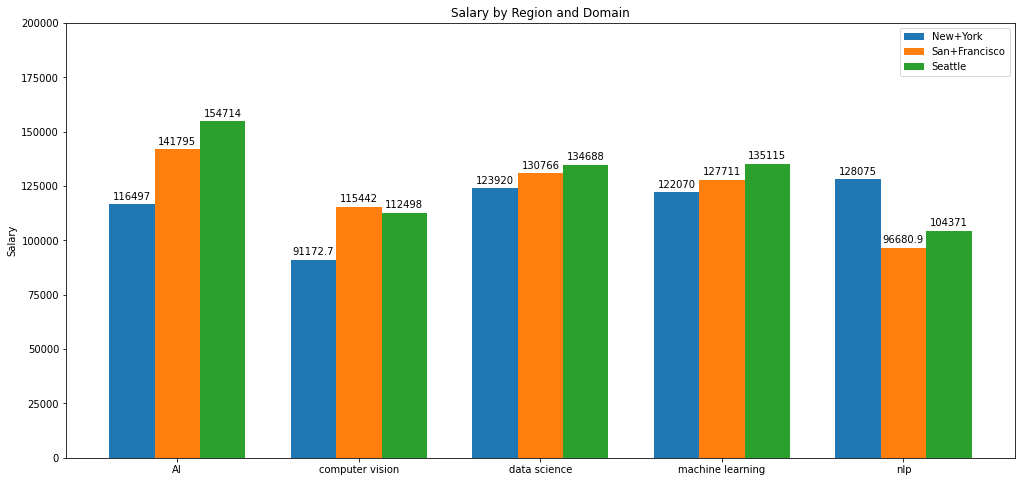

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# cal salary_domain_region
salary_domain_region = build_data2_None_Salary_text[['Salary',"SearchDomain","SearchRegion"]].groupby( ["SearchDomain","SearchRegion"]).mean()

labels=['AI','computer vision','data science','machine learning','nlp']
data = pd.DataFrame({'New+York': [salary_domain_region['Salary']['AI']['New+York'],salary_domain_region['Salary']['computer+vision']['New+York'],salary_domain_region['Salary']['data+science']['New+York'],salary_domain_region['Salary']['machine+learning']['New+York'],salary_domain_region['Salary']['natural+language+processing']['New+York']], \
                     'San+Francisco': [salary_domain_region['Salary']['AI']['San+Francisco'],salary_domain_region['Salary']['computer+vision']['San+Francisco'],salary_domain_region['Salary']['data+science']['San+Francisco'],salary_domain_region['Salary']['machine+learning']['San+Francisco'],salary_domain_region['Salary']['natural+language+processing']['San+Francisco']], \
                     'Seattle': [salary_domain_region['Salary']['AI']['Seattle'],salary_domain_region['Salary']['computer+vision']['Seattle'],salary_domain_region['Salary']['data+science']['Seattle'],salary_domain_region['Salary']['machine+learning']['Seattle'],salary_domain_region['Salary']['natural+language+processing']['Seattle']]},
                    index=labels)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(17,8))
rects1 = ax.bar(x - width, data['New+York'], width, label='New+York')
rects2 = ax.bar(x , data['San+Francisco'], width, label='San+Francisco')
rects3 = ax.bar(x + width, data['Seattle'], width, label='Seattle')

# note value above graph
ax.bar_label(rects1, padding=3) 
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Salary')
ax.set_title('Salary by Region and Domain')
ax.set_xticks(x)
ax.set(ylim=(0, 200000))
ax.set_xticklabels(labels)
ax.legend()


## 

In [ ]:
# one-hot and Normalization

# one-hot SearchRegion
result_temp = pd.get_dummies(build_data2_None_Salary_text['SearchRegion'], prefix='SearchRegion') 
data_onehot_SearchRegion = pd.merge(build_data2_None_Salary_text, result_temp,right_index=True, left_index=True)

# # one-hot SearchDomain
result_temp = pd.get_dummies(data_onehot_SearchRegion['SearchDomain'], prefix='SearchDomain') 
data_onehot_RegionandDomain = pd.merge(data_onehot_SearchRegion, result_temp,right_index=True, left_index=True)

preprocess_data = data_onehot_RegionandDomain

In [ ]:
preprocess_data

,JobTitle,CompanyName,CompanyLocation,CompanyRating,Salary,Date,Extract_Date,Content_url,Content_text,SearchRegion,SearchDomain,Days_ago_number,SearchRegion_New+York,SearchRegion_San+Francisco,SearchRegion_Seattle,SearchDomain_AI,SearchDomain_computer+vision,SearchDomain_data+science,SearchDomain_machine+learning,SearchDomain_natural+language+processing
0,Social Media Content Coordinator,Compass,"New York, NY",None,50000.0,Active 3 days ago,2021-10-29 03:01:55.952931,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Position Title: Social Media Content Coordinat...,New+York,AI,3,1,0,0,1,0,0,0,0
3,newAI Scientist,Harnham,"New York, NY",4.6,150000.0,1 day ago,2021-10-29 03:01:57.027760,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"AI SCIENTIST\nMEDICAL START-UP\n\nNEW YORK, NY...",New+York,AI,1,1,0,0,1,0,0,0,0
22,"RVP, Healthcare Providers",Salesforce,"New York, NY 10036 (Garment District area)",4.3,75000.0,16 days ago,2021-10-29 03:02:03.491193,https://www.indeed.com/rc/clk?jk=d6e27e0dd9b19...,"To get the best candidate experience, please c...",New+York,AI,16,1,0,0,1,0,0,0,0
37,"RVP, Healthcare Providers",Salesforce,"New York, NY 10036 (Garment District area)",4.3,75000.0,16 days ago,2021-10-29 03:02:08.947466,https://www.indeed.com/rc/clk?jk=d6e27e0dd9b19...,"To get the best candidate experience, please c...",New+York,AI,16,1,0,0,1,0,0,0,0
53,"RVP, Healthcare Providers",Salesforce,"New York, NY 10036 (Garment District area)",4.3,75000.0,16 days ago,2021-10-29 03:02:14.737257,https://www.indeed.com/rc/clk?jk=d6e27e0dd9b19...,"To get the best candidate experience, please c...",New+York,AI,16,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029,Data Science Engineer,Salesforce,"Seattle, WA+2 locations",4.3,82400.0,9 days ago,2021-10-29 09:32:05.837150,https://www.indeed.com/rc/clk?jk=88e8a94b7beea...,"To get the best candidate experience, please c...",Seattle,machine+learning,9,0,0,1,0,0,0,1,0
3032,Machine Learning Engineering,Salesforce,"Seattle, WA+1 location",4.3,82400.0,30+ days ago,2021-10-29 09:32:14.479833,https://www.indeed.com/rc/clk?jk=190c3dd923121...,"To get the best candidate experience, please c...",Seattle,machine+learning,30,0,0,1,0,0,0,1,0
3035,Data Scientist (all levels),Shelf Engine,"Seattle, WA",4.0,142500.0,30+ days ago,2021-10-29 09:32:20.628628,https://www.indeed.com/rc/clk?jk=b17ebc9aa6e50...,"At Shelf Engine, our mission is to reduce food...",Seattle,machine+learning,30,0,0,1,0,0,0,1,0
3047,Machine Learning Engineering,Salesforce,"Seattle, WA+1 location",4.3,82400.0,30+ days ago,2021-10-29 09:32:48.802490,https://www.indeed.com/rc/clk?jk=190c3dd923121...,"To get the best candidate experience, please c...",Seattle,machine+learning,30,0,0,1,0,0,0,1,0


# EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_extract = preprocess_data[[
 'Salary',
 'SearchRegion_New+York',
 'SearchRegion_San+Francisco',
 'SearchRegion_Seattle',

 'SearchDomain_AI',
 'SearchDomain_computer+vision',
 'SearchDomain_data+science',
 'SearchDomain_machine+learning',
 'SearchDomain_natural+language+processing',
    
 'Days_ago_number']]

In [ ]:
df_extract

,Salary,SearchRegion_New+York,SearchRegion_San+Francisco,SearchRegion_Seattle,SearchDomain_AI,SearchDomain_computer+vision,SearchDomain_data+science,SearchDomain_machine+learning,SearchDomain_natural+language+processing,Days_ago_number
0,"50,000.00",1,0,0,1,0,0,0,0,3
3,"150,000.00",1,0,0,1,0,0,0,0,1
22,"75,000.00",1,0,0,1,0,0,0,0,16
37,"75,000.00",1,0,0,1,0,0,0,0,16
53,"75,000.00",1,0,0,1,0,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...
3029,"82,400.00",0,0,1,0,0,0,1,0,9
3032,"82,400.00",0,0,1,0,0,0,1,0,30
3035,"142,500.00",0,0,1,0,0,0,1,0,30
3047,"82,400.00",0,0,1,0,0,0,1,0,30


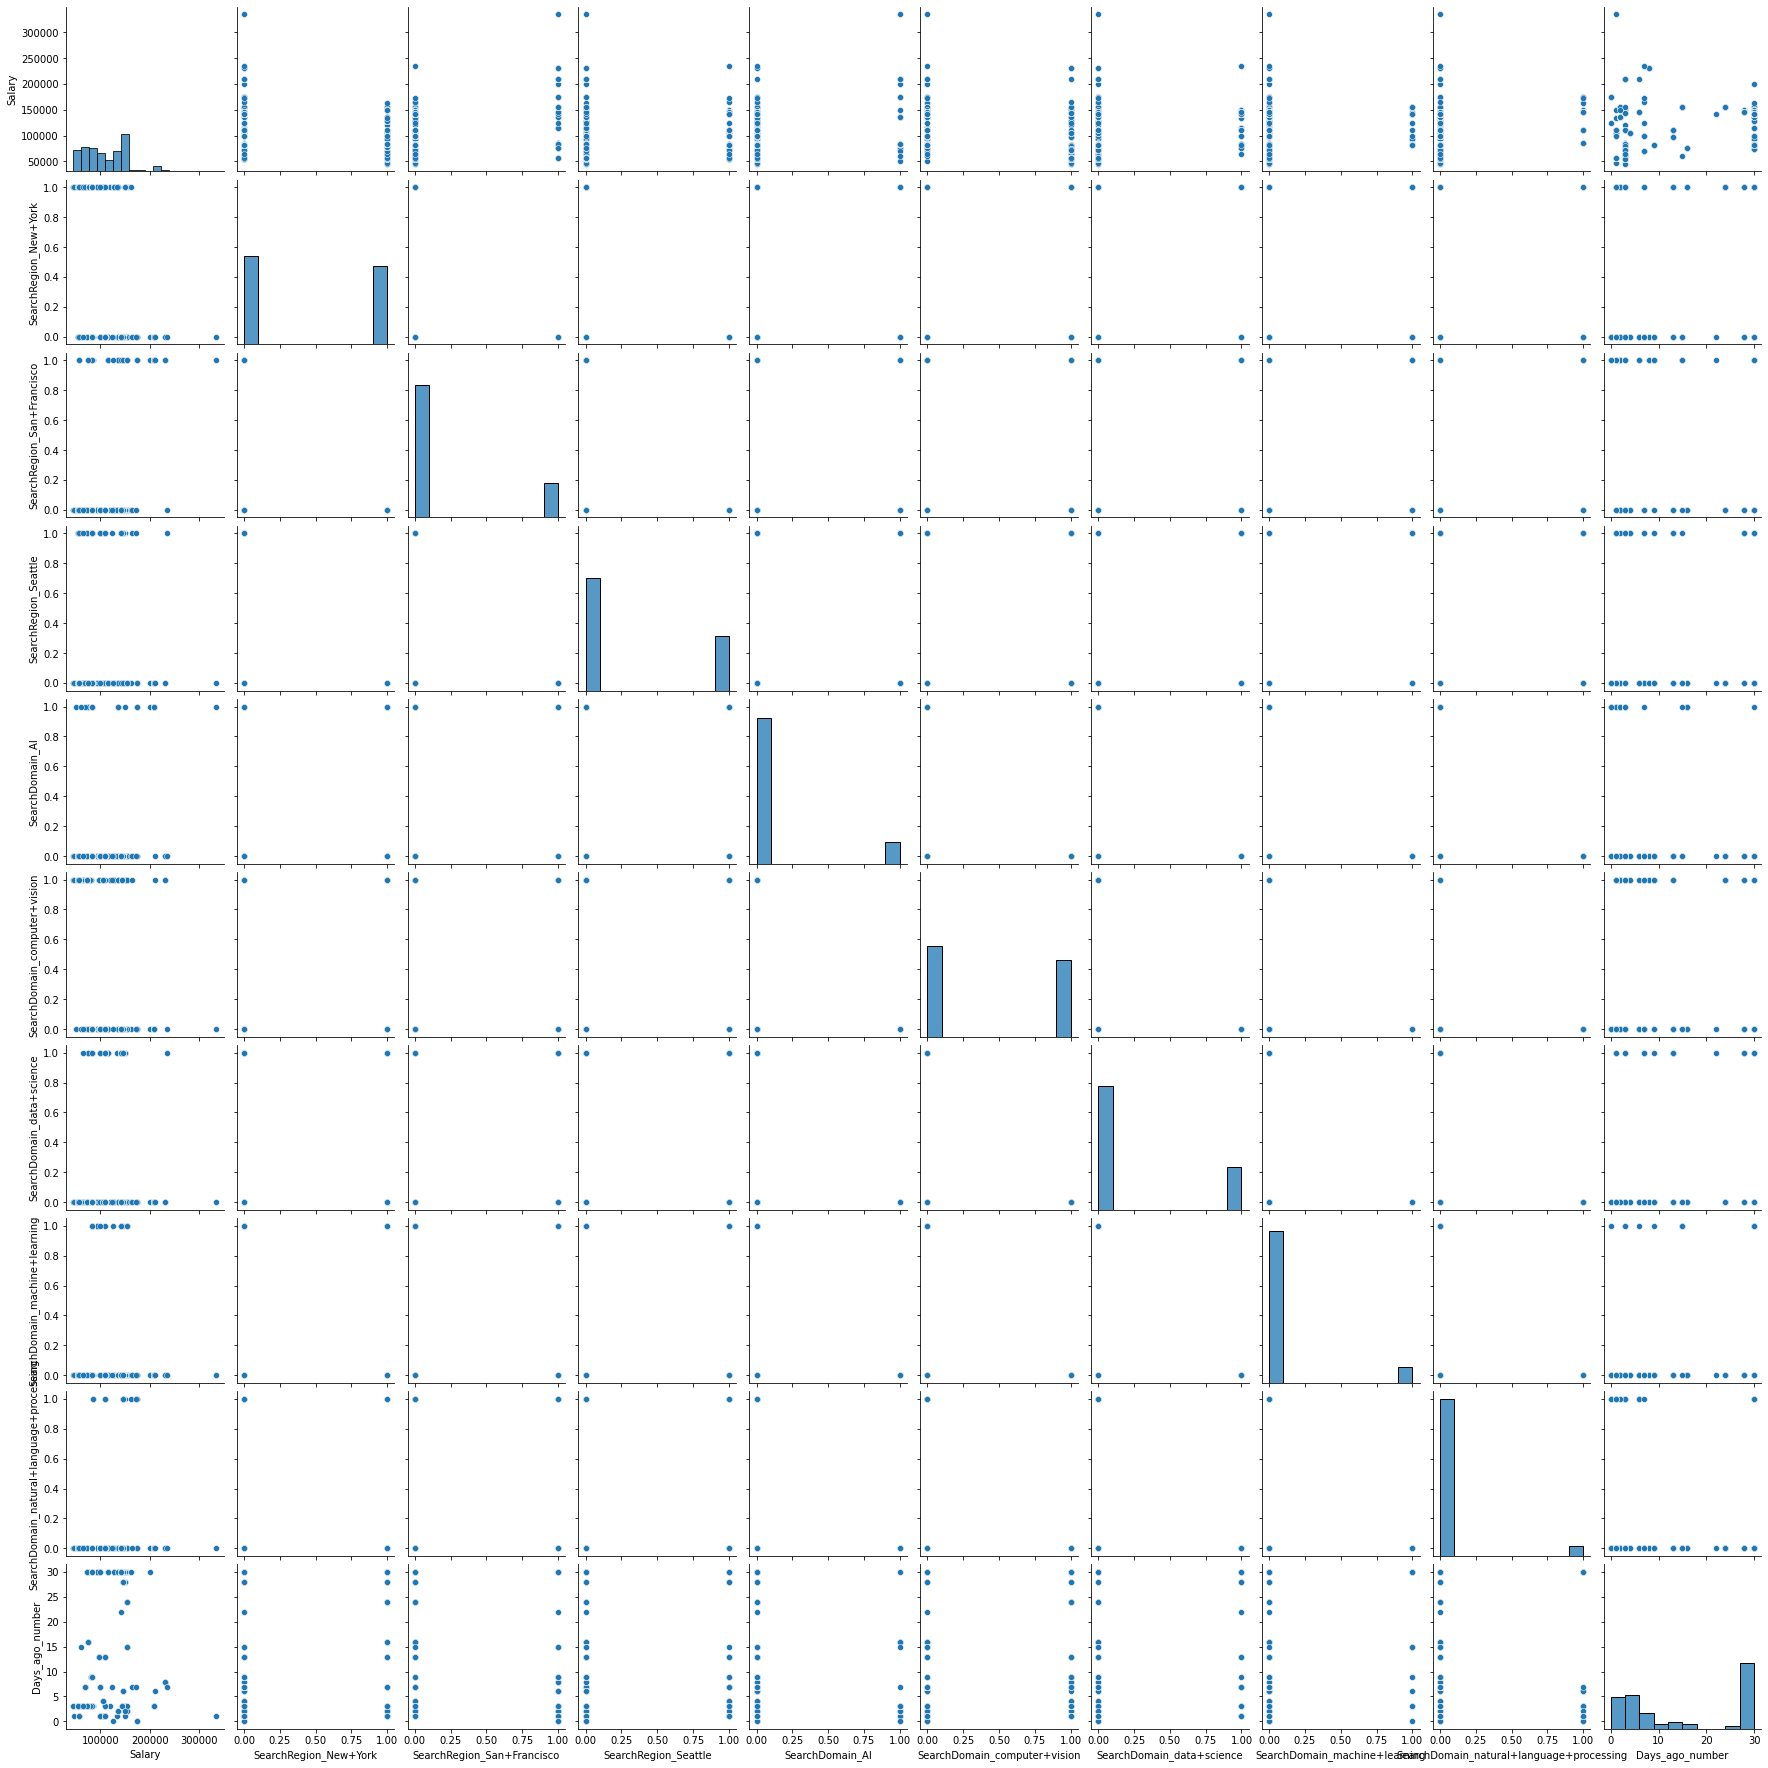

In [ ]:
# Variable correlation
sns.pairplot(data=df_extract)

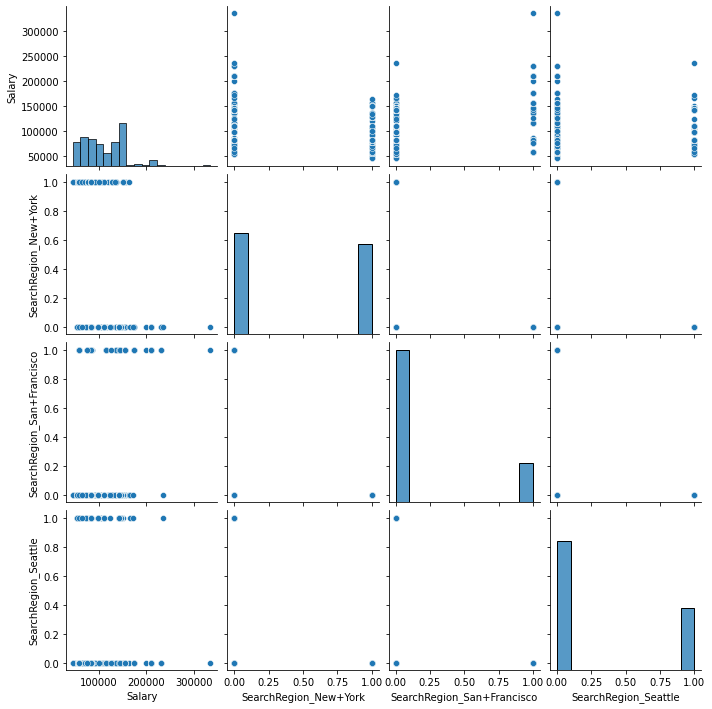

In [ ]:
sns.pairplot(data=df_extract, x_vars=['Salary','SearchRegion_New+York','SearchRegion_San+Francisco','SearchRegion_Seattle'],\
             y_vars=['Salary','SearchRegion_New+York','SearchRegion_San+Francisco','SearchRegion_Seattle']);

In [ ]:
# Variable correlation
df_extract.corr()

,SearchRegion_New+York,SearchRegion_San+Francisco,SearchRegion_Seattle,SearchDomain_AI,SearchDomain_computer+vision,SearchDomain_data+science,SearchDomain_machine+learning,SearchDomain_natural+language+processing,Days_ago_number
SearchRegion_New+York,1.00,-0.48,-0.65,-0.20,0.38,-0.17,0.01,-0.21,0.17
SearchRegion_San+Francisco,-0.48,1.00,-0.35,0.32,-0.18,-0.06,-0.04,0.10,-0.24
SearchRegion_Seattle,-0.65,-0.35,1.00,-0.06,-0.25,0.24,0.03,0.14,0.02
SearchDomain_AI,-0.20,0.32,-0.06,1.00,-0.35,-0.23,-0.12,-0.10,-0.29
SearchDomain_computer+vision,0.38,-0.18,-0.25,-0.35,1.00,-0.54,-0.30,-0.24,-0.30
SearchDomain_data+science,-0.17,-0.06,0.24,-0.23,-0.54,1.00,-0.19,-0.15,0.37
SearchDomain_machine+learning,0.01,-0.04,0.03,-0.12,-0.30,-0.19,1.00,-0.08,0.28
SearchDomain_natural+language+processing,-0.21,0.10,0.14,-0.10,-0.24,-0.15,-0.08,1.00,0.01
Days_ago_number,0.17,-0.24,0.02,-0.29,-0.30,0.37,0.28,0.01,1.00


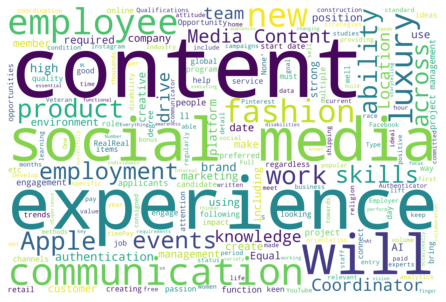

In [ ]:
# word cloud
from wordcloud import WordCloud, STOPWORDS

text = data['Content_text'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4e77b477-2259-494e-aaf4-b532e5790ad6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>